In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
def load_halo_summary(filename):
    dtype=[('Nsat','i8'),
           ('vmax', 'f8'),
           ('mstar', 'f8'), 
           ('d', 'f8'),
           ('r_ab_x', 'f8'), ('r_ab_y', 'f8'),('r_ab_z','f8'),
           ('a', 'f8'),
           ('b', 'f8'),
           ('c', 'f8'),
           ('Ia_x', 'f8'),
           ('Ia_y', 'f8'),
           ('Ia_z', 'f8'),
           ('plane_width', 'f8'),
           ('plane_distance','f8'),
           ('plane_x','f8'),('plane_y','f8'),('plane_z','f8'),
          ('beta', 'f8')]
    file_data = np.loadtxt(filename, dtype=dtype)    
    return file_data

In [3]:
data_path = "../data/mstar_selected_summary"
file_halo_A = os.path.join(data_path, "halo_A.dat")
file_halo_B = os.path.join(data_path, "halo_B.dat")
hubble = 0.73


[ 75.33  73.66   8.16  78.99  46.12  24.5   39.54   3.9   25.52  12.51
  10.2 ]
[13  9  4 12  9  6  5  4  6  6  5]


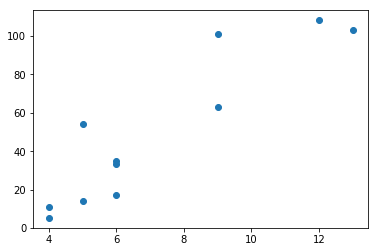

In [4]:
data_halo_A = load_halo_summary(file_halo_A)
data_halo_B = load_halo_summary(file_halo_B)
print(data_halo_B['plane_width'])
print(data_halo_B['Nsat'])
plt.scatter(data_halo_B['Nsat'], data_halo_B['plane_width']/hubble)

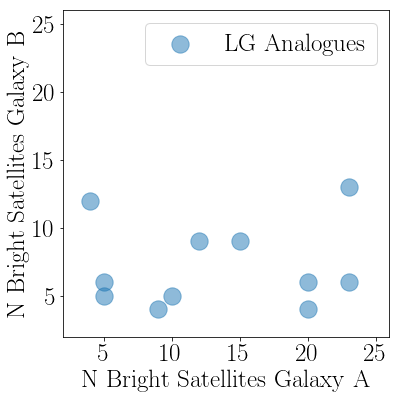

In [5]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['Nsat'], data_halo_B['Nsat'], label='LG Analogues',s=300, alpha=0.5)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,30,5))
plt.yticks(np.arange(0,30,5))
plt.xlim([2,26])
plt.ylim([2,26])
plt.legend(loc=1)
plt.xlabel(r"N Bright Satellites Galaxy A")
plt.ylabel(r"N Bright Satellites Galaxy B")
plt.savefig("../paper/nsat.pdf", bbox_inches='tight')

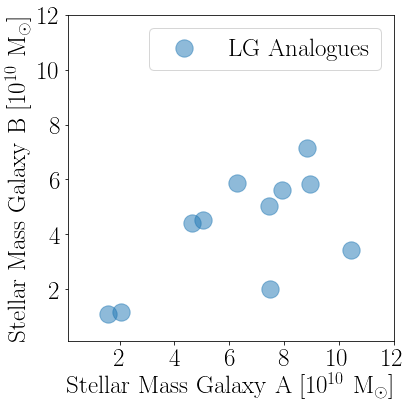

In [6]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['mstar']/hubble, data_halo_B['mstar']/hubble, label='LG Analogues', s=300, alpha=0.5)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,20,2))
plt.yticks(np.arange(0,20,2))
plt.xlim([0.1,12])
plt.ylim([0.1,12])
plt.legend(loc=1)
plt.xlabel(r"Stellar Mass Galaxy A [$10^{10}$ M$_{\odot}$]")
plt.ylabel(r"Stellar Mass Galaxy B [$10^{10}$ M$_{\odot}$]")
plt.savefig("../paper/mstar.pdf", bbox_inches='tight')

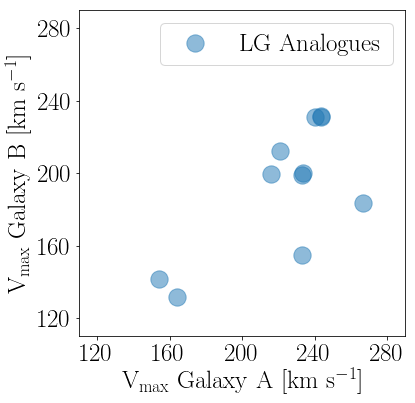

In [7]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['vmax'], data_halo_B['vmax'], label='LG Analogues', s=300, alpha=0.5)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,360,40))
plt.yticks(np.arange(0,360,40))
plt.xlim([110,290])
plt.ylim([110,290])
plt.legend(loc=1)
plt.xlabel(r"V$_{\rm max}$ Galaxy A [km s$^{-1}$]")
plt.ylabel(r"V$_{\rm max}$ Galaxy B [km s$^{-1}$]")
plt.savefig("../paper/vmax.pdf", bbox_inches='tight')

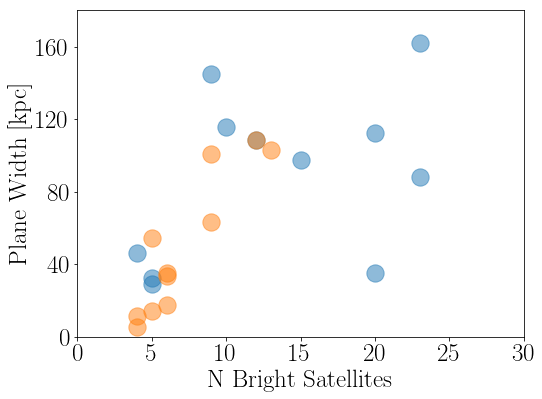

In [8]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['Nsat'], data_halo_A['plane_width']/hubble, label='Galaxy A', s=300, alpha=0.5)
plt.scatter(data_halo_B['Nsat'], data_halo_B['plane_width']/hubble, label='Galaxy B', s=300, alpha=0.5)

#plt.axes().set_aspect('equal', adjustable='datalim')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,360,40))
plt.xlim([0,30])
plt.ylim([0,180])
#plt.legend(loc=2)
plt.xlabel(r"N Bright Satellites")
plt.ylabel(r"Plane Width [kpc]")
plt.savefig("../paper/planes.pdf", bbox_inches='tight')

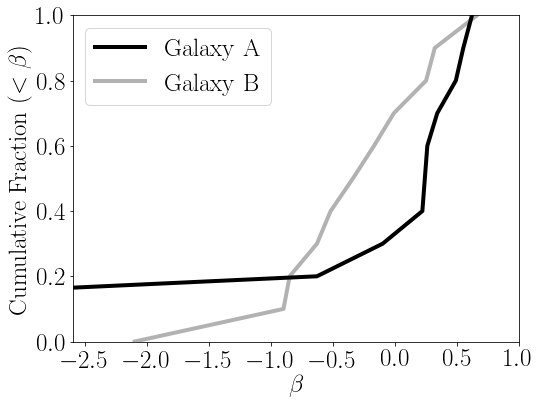

In [22]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)
sorted_A = np.sort(data_halo_A['beta'])
sorted_B = np.sort(data_halo_B['beta'])

plt.plot(sorted_A, cum_profile, label='Galaxy A', color='black', linewidth=4)
plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=4, alpha=0.3)


#plt.axes().set_aspect('equal'
plt.xticks(np.arange(-6,2,0.5))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([-2.6,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\beta$")
plt.ylabel(r"Cumulative Fraction ($<\beta$)")
plt.savefig("../paper/beta.pdf", bbox_inches='tight')